In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

np.random.seed(42)


# Mount Google Drive
drive.mount('/content/drive')

# Replace with the path to your dataset in Google Drive
file_path = '/content/drive/My Drive/Test_reg/food_regression_db.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Class,Width,Height,Area,Perimeter,Weight,Calories
0,Singara,62.4490,60.0096,1535842.395,220.2119,62.36,162.7596
1,Singara,56.7324,59.5225,1428534.139,211.5930,62.36,162.7596
2,Singara,56.5944,62.4490,1443654.528,210.8584,62.36,162.7596
3,Singara,73.8252,57.7762,1397855.612,221.0269,62.36,162.7596
4,Singara,68.7339,52.0558,1476275.488,217.1506,62.36,162.7596
5,Singara,66.5758,75.1662,1560909.849,236.0694,62.36,162.7596
6,Singara,59.7429,72.1893,1482659.022,241.1632,62.36,162.7596
7,Singara,67.2273,72.4432,1405722.273,229.2953,62.36,162.7596
8,Singara,64.9815,72.7571,1493308.977,230.1428,62.36,162.7596
9,Singara,87.1250,75.9688,1931784.375,270.6118,65.20,170.1720


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Class      644 non-null    object 
 1   Width      644 non-null    float64
 2   Height     644 non-null    float64
 3   Area       644 non-null    float64
 4   Perimeter  644 non-null    float64
 5   Weight     644 non-null    float64
 6   Calories   644 non-null    float64
dtypes: float64(6), object(1)
memory usage: 35.7+ KB


In [ ]:
df['Class'].value_counts()

,count
Class,
Beguni,136
Peaju,133
Somusa,131
Singara,128
Puri,116


In [ ]:
df.describe()

,Width,Height,Area,Perimeter,Weight,Calories
count,644.000000,644.000000,6.440000e+02,644.000000,644.000000,644.000000
mean,77.244639,68.095825,1.917435e+06,249.663398,37.411180,82.553017
std,27.288800,25.040364,1.130809e+06,82.882515,19.888032,58.409402
min,34.677500,17.212500,5.447469e+05,126.112800,11.330000,16.697000
25%,56.741475,50.274550,1.175782e+06,193.436675,17.090000,23.440700
50%,72.224350,65.875000,1.547347e+06,235.678100,34.010000,82.984400
75%,89.503825,79.687500,2.124985e+06,285.561100,59.530000,142.863000
max,188.062500,181.687500,7.471135e+06,614.013200,68.030000,177.558300


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())


Missing Values:
Class        6
Width        6
Height       6
Area         6
Perimeter    6
Weight       6
Calories     6
dtype: int64
Class        0
Width        0
Height       0
Area         0
Perimeter    0
Weight       0
Calories     0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.pairplot(df, hue='Class', diag_kind='kde')  # Assuming 'Class' is a categorical variable
#plt.show()

In [ ]:
from scipy.stats import zscore
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate Z-scores for numeric columns
z_scores = numeric_cols.apply(zscore)

# Define a Z-score thresholda
threshold = 3

print("BEFOR ZSCORE")
print(df.describe())
df = df[(np.abs(z_scores) <= threshold).all(axis=1)]
print("AFTER ZSCORE")
print(df.describe())

BEFOR ZSCORE
            Width      Height          Area   Perimeter      Weight  \
count  644.000000  644.000000  6.440000e+02  644.000000  644.000000   
mean    77.244639   68.095825  1.917435e+06  249.663398   37.411180   
std     27.288800   25.040364  1.130809e+06   82.882515   19.888032   
min     34.677500   17.212500  5.447469e+05  126.112800   11.330000   
25%     56.741475   50.274550  1.175782e+06  193.436675   17.090000   
50%     72.224350   65.875000  1.547347e+06  235.678100   34.010000   
75%     89.503825   79.687500  2.124985e+06  285.561100   59.530000   
max    188.062500  181.687500  7.471135e+06  614.013200   68.030000   

         Calories  
count  644.000000  
mean    82.553017  
std     58.409402  
min     16.697000  
25%     23.440700  
50%     82.984400  
75%    142.863000  
max    177.558300  
AFTER ZSCORE
            Width      Height          Area   Perimeter      Weight  \
count  627.000000  627.000000  6.270000e+02  627.000000  627.000000   
mean    75.6

In [ ]:
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())

Class        0
Width        0
Height       0
Area         0
Perimeter    0
Weight       0
Calories     0
dtype: int64
Class        0
Width        0
Height       0
Area         0
Perimeter    0
Weight       0
Calories     0
dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse=False will return a dense numpy array

# Fit and transform the 'Class' column
encoded_class = encoder.fit_transform(df[['Class']])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_class, columns=encoder.categories_[0])

# Concatenate the original DataFrame with the new one-hot encoded columns
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original 'Class' column (optional)
df_encoded = df_encoded.drop('Class', axis=1)
df_encoded = df_encoded.drop('Weight', axis=1)

df_encoded.head(5)

,Width,Height,Area,Perimeter,Calories,Beguni,Peaju,Puri,Singara,Somusa
0,62.4490,60.0096,1535842.395,220.2119,162.7596,0.0,0.0,0.0,1.0,0.0
1,56.7324,59.5225,1428534.139,211.5930,162.7596,0.0,0.0,0.0,1.0,0.0
2,56.5944,62.4490,1443654.528,210.8584,162.7596,0.0,0.0,0.0,1.0,0.0
3,73.8252,57.7762,1397855.612,221.0269,162.7596,0.0,0.0,0.0,1.0,0.0
4,68.7339,52.0558,1476275.488,217.1506,162.7596,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_columns = ['Width', 'Height', 'Area', 'Perimeter']

df_encoded[scaled_columns] = scaler.fit_transform(df_encoded[scaled_columns])

df_encoded.head(5)


,Width,Height,Area,Perimeter,Calories,Beguni,Peaju,Puri,Singara,Somusa
0,0.226348,0.362350,0.214519,0.256731,162.7596,0.0,0.0,0.0,1.0,0.0
1,0.179755,0.358226,0.191293,0.233216,162.7596,0.0,0.0,0.0,1.0,0.0
2,0.178631,0.383004,0.194566,0.231212,162.7596,0.0,0.0,0.0,1.0,0.0
3,0.319068,0.343441,0.184653,0.258954,162.7596,0.0,0.0,0.0,1.0,0.0
4,0.277572,0.295008,0.201626,0.248379,162.7596,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627 entries, 0 to 643
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Class      627 non-null    object 
 1   Width      627 non-null    float64
 2   Height     627 non-null    float64
 3   Area       627 non-null    float64
 4   Perimeter  627 non-null    float64
 5   Weight     627 non-null    float64
 6   Calories   627 non-null    float64
dtypes: float64(6), object(1)
memory usage: 55.4+ KB


In [ ]:
print(df_encoded.isnull().sum())
df_encoded = df_encoded.dropna()
print(df_encoded.isnull().sum())

Width        17
Height       17
Area         17
Perimeter    17
Calories     17
Beguni       17
Peaju        17
Puri         17
Singara      17
Somusa       17
dtype: int64
Width        0
Height       0
Area         0
Perimeter    0
Calories     0
Beguni       0
Peaju        0
Puri         0
Singara      0
Somusa       0
dtype: int64


In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627 entries, 0 to 643
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Class      627 non-null    object 
 1   Width      627 non-null    float64
 2   Height     627 non-null    float64
 3   Area       627 non-null    float64
 4   Perimeter  627 non-null    float64
 5   Weight     627 non-null    float64
 6   Calories   627 non-null    float64
dtypes: float64(6), object(1)
memory usage: 55.4+ KB


/tmp/ipython-input-31-3075955604.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=list(range(1, 6)), y=score, palette='Blues_d', ci=None, ax=ax)
/tmp/ipython-input-31-3075955604.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, 6)), y=score, palette='Blues_d', ci=None, ax=ax)
/tmp/ipython-input-31-3075955604.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=list(range(1, 6)), y=score, palette='Blues_d', ci=None, ax=ax)
/tmp/ipython-input-31-3075955604.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, 6)), y=score, palette

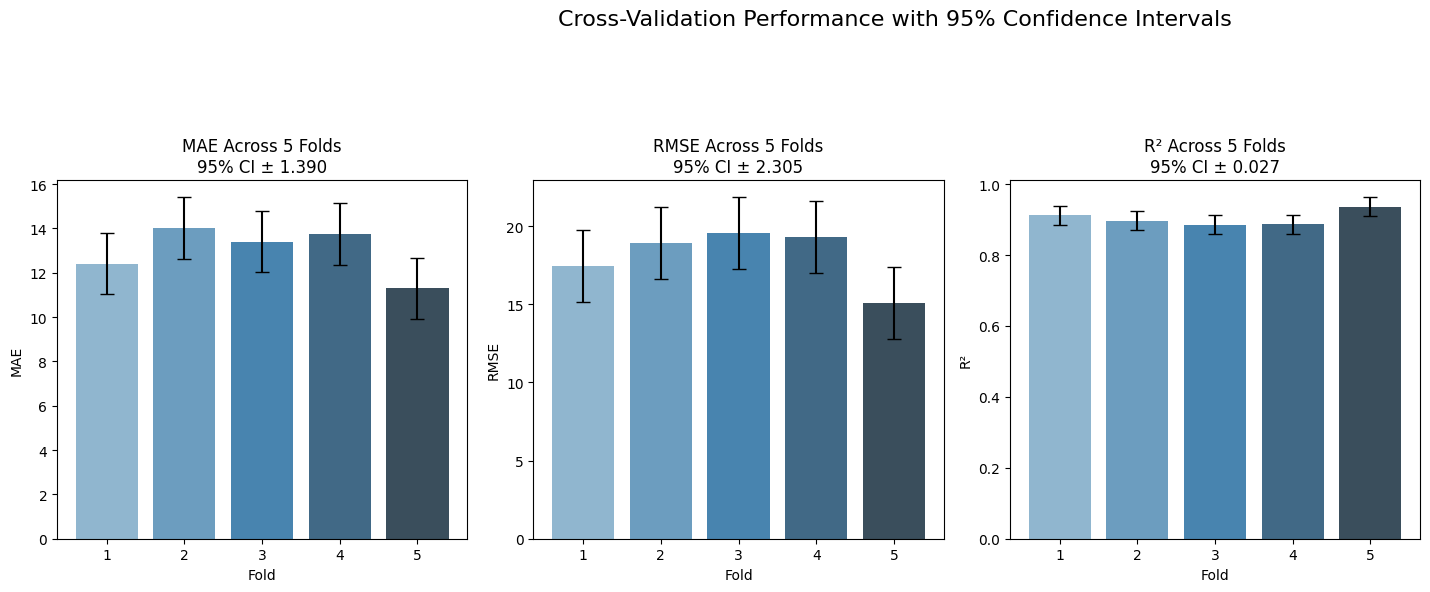

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression  # Replace with your model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

# ---------- Setup ----------
model = LinearRegression()  # You can replace this with any regressor
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Replace these with your actual feature and target sets
X = df_encoded.drop(['Calories'], axis=1)
y = df_encoded['Calories']

mae_scores = []
rmse_scores = []
r2_scores = []

# ---------- Cross-validation ----------
for train_idx, test_idx in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train_cv, y_train_cv)
    y_pred = model.predict(X_test_cv)

    mae_scores.append(mean_absolute_error(y_test_cv, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_cv, y_pred)))
    r2_scores.append(r2_score(y_test_cv, y_pred))

# ---------- Compute 95% Confidence Intervals ----------
def compute_ci(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean, margin

mae_mean, mae_margin = compute_ci(mae_scores)
rmse_mean, rmse_margin = compute_ci(rmse_scores)
r2_mean, r2_margin = compute_ci(r2_scores)

# ---------- Plotting ----------
metrics = ['MAE', 'RMSE', 'R²']
scores = [mae_scores, rmse_scores, r2_scores]
margins = [mae_margin, rmse_margin, r2_margin]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, metric, score, margin in zip(axes, metrics, scores, margins):
    sns.barplot(x=list(range(1, 6)), y=score, palette='Blues_d', ci=None, ax=ax)
    ax.errorbar(x=np.arange(5), y=score, yerr=margin, fmt='none', c='black', capsize=5)
    ax.set_title(f'{metric} Across 5 Folds\n95% CI ± {margin:.3f}')
    ax.set_xlabel("Fold")
    ax.set_ylabel(metric)

plt.suptitle("Cross-Validation Performance with 95% Confidence Intervals", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.8, 0.85])
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Calories'], axis=1)

y = df_encoded['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Linear Regression:")
print("Mean Squared Error (MSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Linear Regression:
Mean Squared Error (MSE): 17.44731494010273
Mean Absolute Error (MAE): 12.40824661194809
R-squared (R2): 0.9123976424963678


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the KNN Regression model
model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("K-Nearest Neighbors Regression (KNN):")
print("Mean Squared Error (MSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

K-Nearest Neighbors Regression (KNN):
Mean Squared Error (MSE): 11.853682765321446
Mean Absolute Error (MAE): 7.619044590163935
R-squared (R2): 0.9595642788282543


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the Decision Tree Regression model
model = DecisionTreeRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Decision Tree Regression:")
print("Mean Squared Error (MSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Decision Tree Regression:
Mean Squared Error (MSE): 13.66250920335358
Mean Absolute Error (MAE): 7.811051639344263
R-squared (R2): 0.946282037993297


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the Random Forest Regression model
model = RandomForestRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Random Forest Regression:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Random Forest Regression:
Root Mean Squared Error (RMSE): 11.26507792883427
Mean Absolute Error (MAE): 6.856998189890727
R-squared (R2): 0.9634803174698934


In [ ]:
import joblib

# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")


Model saved as random_forest_model.pkl


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Calculate performance metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the performance metrics for Gradient Boosting
print("Gradient Boosting Regression:")
print("Mean Squared Error (MSE):", rmse)
print("Mean Absolute Error (MAE):", mae_gb)
print("R-squared (R²):", r2_gb)

Gradient Boosting Regression:
Mean Squared Error (MSE): 12.153342843452311
Mean Absolute Error (MAE): 7.834908974053831
R-squared (R²): 0.9574940143198906


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the AdaBoost Regression model
ab_model = AdaBoostRegressor()

# Train the model on the training data
ab_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ab = ab_model.predict(X_test)

# Calculate performance metrics
mse_ab = mean_squared_error(y_test, y_pred_ab)
rmse = np.sqrt(mse_ab)

mae_ab = mean_absolute_error(y_test, y_pred_ab)
r2_ab = r2_score(y_test, y_pred_ab)

# Print the performance metrics for AdaBoost
print("AdaBoost Regression:")
print("Mean Squared Error (MSE):", rmse)
print("Mean Absolute Error (MAE):", mae_ab)
print("R-squared (R²):", r2_ab)

AdaBoost Regression:
Mean Squared Error (MSE): 12.057877061495537
Mean Absolute Error (MAE): 8.122728923183452
R-squared (R²): 0.9581591695330548
